In [1]:
import pandas as pd
import numpy as np

# for box-cox transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv('../../../datasets/Data_Cleaning/kickstarter-projects/ks-projects-201801.csv')

# set seed for reproducibility
np.random.seed(0)

In [2]:
kickstarters_2017.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


/Users/ningxuhui/opt/anaconda3/envs/cv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ningxuhui/opt/anaconda3/envs/cv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled Data')

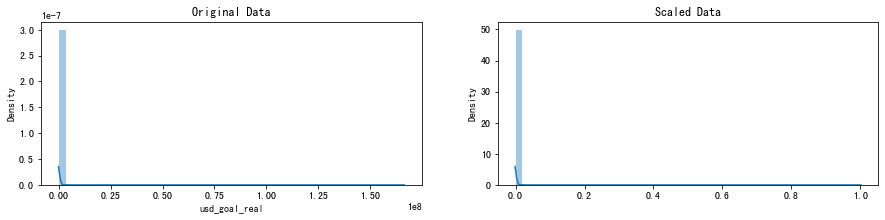

In [5]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

# plot the original & scaled data together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title('Scaled Data')

In [7]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()), '\nMaximum value:',
      float(original_data.max()))
print('-'*30)
print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()), '\nMaximum value:',
      float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
------------------------------

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


In [8]:
#select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

# Use original_goal_data to create a new DataFrame scaled_goal_data with
# values scaled between 0 and 1. You must use the minimax_scaling() function
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

In [9]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0
index_of_positive_pledges

0         False
1          True
2          True
3          True
4          True
          ...  
378656     True
378657     True
378658     True
378659     True
378660     True
Name: usd_pledged_real, Length: 378661, dtype: bool

/Users/ningxuhui/opt/anaconda3/envs/cv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ningxuhui/opt/anaconda3/envs/cv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

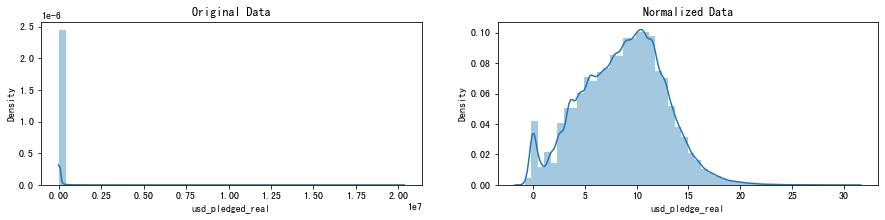

In [10]:
# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0],
                               name='usd_pledge_real', index=positive_pledges.index)

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title('Normalized Data')